# Imports

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
%matplotlib inline

# Load the data

In [2]:
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.drop('Revenue', axis=1) 
    y = data['Revenue']  

    return X, y


# Econode categorical data

In [3]:


def encode_features(X):
    label_encoder = LabelEncoder()

    # Label encoding for 'Month'
    X['Month'] = label_encoder.fit_transform(X['Month'])

    # Label encoding for 'VisitorType'
    X['VisitorType'] = label_encoder.fit_transform(X['VisitorType'])

    return X


# Sigmoid function

In [4]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

# Cost function

In [5]:
def compute_cost(X, y, w, b, lambda_= 1):

    m, n = X.shape


    Z = np.dot(X,w)+b
    F_wb = sigmoid(Z)
    total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m

    

    return total_cost

# Compute gradient function

In [6]:
def compute_gradient(X, y, w, b, lambda_=None): 
    
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.


    F_wb = sigmoid(np.dot(X,w) + b)
    Err = F_wb - y
    dj_dw = np.dot(Err, X)/m
    dj_db = np.sum(Err)/m

        
    return dj_db, dj_dw

# Compute cost function (reg)

In [7]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape
    
    cost_without_reg = compute_cost(X, y, w, b) 
    reg_cost = 0.


    reg_cost = np.sum(np.square(w))

    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

# Gradient descent function

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:    
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

# Gradient descent function (reg)

In [9]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    dj_dw = dj_dw + (lambda_/m) * w    
        
    return dj_db, dj_dw

# Predict function

In [10]:
def predict(X, w, b): 

    m, n = X.shape   
    p = np.zeros(m)
    
    F_wb = sigmoid(np.dot(X,w) + b)
    p = (F_wb>=0.5)
        
    return p

# Main code

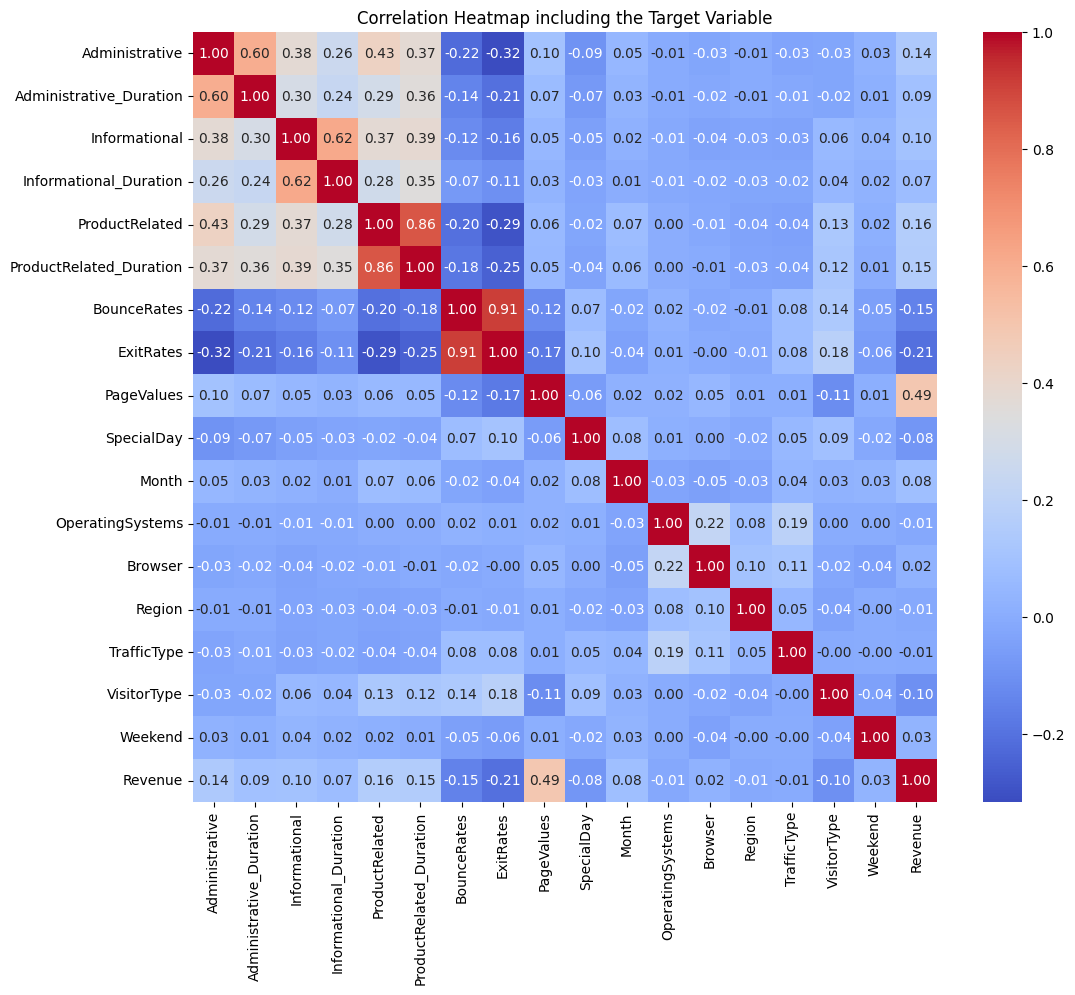

Iteration    0: Cost     1.33   
Iteration  100: Cost     0.34   
Iteration  200: Cost     0.30   
Iteration  300: Cost     0.30   
Iteration  400: Cost     0.29   
Iteration  500: Cost     0.29   
Iteration  600: Cost     0.29   
Iteration  700: Cost     0.29   
Iteration  800: Cost     0.29   
Iteration  900: Cost     0.29   
Iteration  999: Cost     0.29   
Iteration    0: Cost     1.02   
Iteration  100: Cost     0.47   
Iteration  200: Cost     0.44   
Iteration  300: Cost     0.43   
Iteration  400: Cost      nan   


/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, n

Iteration  500: Cost      nan   


/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, n

Iteration  600: Cost      nan   


/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, n

Iteration  700: Cost      nan   
Iteration  800: Cost      nan   


/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, n

Iteration  900: Cost      nan   
Iteration  999: Cost      nan   


/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, np.log(F_wb)) - np.dot(1 - y, np.log(1 - F_wb)))/m
/var/folders/6d/z9kcjjd94wx800d4p6384p7r0000gn/T/ipykernel_88696/1833166611.py:9: RuntimeWarning: divide by zero encountered in log
  total_cost = (-np.dot(y, n

In [101]:

# Load the dataset
X, y = load_data("dataset.csv")
X_encoded = encode_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Combine features and target variable
full_data = pd.concat([X_encoded, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = full_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap including the Target Variable')
plt.show()

# Initialize the weights and bias for the logistic regression model
np.random.seed(1)
initial_w = np.random.rand(X_train.shape[1])-0.5
initial_b = 1

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 1;                                       
# Some gradient descent settings
iterations = 1000
alpha = 0.1

w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the weights and bias for the logistic regression model
np.random.seed(1)
initial_w_smote = np.random.rand(X_train_smote.shape[1])-0.5  # Weights for the SMOTE data
initial_b_smote = 1.  # Bias for the SMOTE data

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 1

# Gradient descent settings
iterations = 1000
alpha = 0.1

# Run gradient descent on the SMOTE data
w_smote, b_smote, J_history_smote, _ = gradient_descent(
    X_train_smote, y_train_smote, initial_w_smote, initial_b_smote,
    compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_
)



# Finding the optimal parameters 

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_optimal_lambda_combined(X_train, y_train, lambda_range, gradient_descent, compute_cost_reg, compute_gradient_reg, alpha_range, iterations=1000):
    plt.figure(figsize=(12, 8))

    for alpha in alpha_range:
        cost_values = []
        for lambda_ in lambda_range:
            np.random.seed(1)
            initial_w = np.random.rand(X_train.shape[1]) - 0.5
            initial_b = 1

            w, b, J_history, _ = gradient_descent(
                X_train, y_train, initial_w, initial_b,
                compute_cost_reg, compute_gradient_reg,
                alpha, iterations, lambda_
            )

            cost_values.append(J_history[-1])

        plt.plot(lambda_range, cost_values, marker='o', label=f'Alpha: {alpha}')

    plt.xscale('log')
    plt.xlabel('Lambda (Regularization parameter)')
    plt.ylabel('Cost')
    plt.title('Cost vs Lambda for Different Alphas (1.000 iterations)')
    plt.legend()
    plt.grid(True)
    
    return plt



In [ ]:
# Load the dataset
X, y = load_data("dataset.csv")
X_encoded = encode_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Define the range of lambda values you want to test
lambda_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define a range of alpha values to test
alpha_range = [0.001, 0.01, 0.1, 1]

# Plot the combined graph
combined_plot = plot_optimal_lambda_combined(X_train, y_train, lambda_range, gradient_descent, compute_cost_reg, compute_gradient_reg, alpha_range, 1000)
combined_plot.show()



# Metrics

In [81]:
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
predictions = sigmoid(np.dot(X_test_scaled, w) + b)
predictions_smote = sigmoid(np.dot(X_test_scaled, w_smote) + b_smote)

# Convert probabilities to binary predictions
binary_predictions = (predictions >= 0.5).astype(int)
binary_predictions_smote = (predictions_smote >= 0.5).astype(int)

# Calculate the confusion matrices
conf_matrix = confusion_matrix(binary_predictions, y_test)
conf_matrix_smote = confusion_matrix(binary_predictions_smote, y_test)


# Calculate the metrics
tn = conf_matrix[0, 0]  # True Negative
fp = conf_matrix[0, 1]  # False Positive
tp = conf_matrix[1, 1]  # True Positive
fn = conf_matrix[1, 0]  # False Negative
tp_smote = conf_matrix_smote[1, 1]  # True Positive
fp_smote = conf_matrix_smote[0, 1]  # False Positive
tn_smote = conf_matrix_smote[0, 0]  # True Negative
fn_smote = conf_matrix_smote[1, 0]  # False Negative


accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy_smote = (tp_smote + tn_smote) / (tp_smote + tn_smote + fp_smote + fn_smote)

sensitivity = tp / (tp + fn)
sensitivity_smote = tp_smote / (tp_smote + fn_smote)

specificity = tn/(tn+fp)
specificity_smote = tn_smote/(tn_smote+fp_smote)

f1 = f1_score(binary_predictions, y_test)
f1_smote = f1_score(binary_predictions_smote, y_test)

print(f'Accuracy: {accuracy:.2f} (without SMOTE) vs {accuracy_smote:.2f} (with SMOTE)')
print(f'Sensitivity: {sensitivity:.2f} (without SMOTE) vs {sensitivity_smote:.2f} (with SMOTE)')
print(f'Specificity: {specificity:.2f} (without SMOTE) vs {specificity_smote:.2f} (with SMOTE)')
print(f'F1 Score: {f1:.2f} (without SMOTE) vs {f1_smote:.2f} (with SMOTE)')

Accuracy: 0.87 (without SMOTE) vs 0.87 (with SMOTE)
Sensitivity: 0.73 (without SMOTE) vs 0.60 (with SMOTE)
Specificity: 0.88 (without SMOTE) vs 0.95 (with SMOTE)
F1 Score: 0.46 (without SMOTE) vs 0.66 (with SMOTE)
